# Import Libraries

In [1]:
import os
os.getcwd()

'E:\\PYTHONCLASSJUPYTER\\PrakashSenapati\\2024_10_23_Xgboost'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load & Preview Dataset

In [8]:
df = pd.read_csv('Breast_cancer_data.csv')

In [9]:
df.shape

(569, 6)

In [10]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


# Check the distribution of target variable (`diagnosis`)

In [12]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

* 0 is for Negative prediction and 1 for Positive prediction
* We can see that the problem is binary classification task

# Declare feature vector (X) and target variable (y)

In [13]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]

In [14]:
y = df['diagnosis']

In [16]:
print( X.shape )
print( y.shape )

(569, 5)
(569,)


In [17]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

# Split dataset into training and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(398, 5)
(171, 5)
(398,)
(171,)


In [22]:
X_train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
478,11.490,14.59,73.99,404.9,0.10460
303,10.490,18.61,66.86,334.3,0.10680
155,12.250,17.94,78.27,460.3,0.08654
186,18.310,18.58,118.60,1041.0,0.08588
101,6.981,13.43,43.79,143.5,0.11700


In [23]:
y_train.head()

478    1
303    1
155    1
186    0
101    1
Name: diagnosis, dtype: int64

In [24]:
X_test.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
512,13.40,20.52,88.64,556.7,0.11060
457,13.21,25.25,84.10,537.9,0.08791
439,14.02,15.66,89.59,606.5,0.07966
298,14.26,18.17,91.22,633.1,0.06576
37,13.03,18.42,82.61,523.8,0.08983


In [25]:
y_test.head()

512    0
457    1
439    1
298    1
37     1
Name: diagnosis, dtype: int64

# LGBMClassifier

In [26]:
lgbm_classifier = lgb.LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier()

**Model Prediction**

In [27]:
y_pred = lgbm_classifier.predict(X_test)
y_pred.shape

(171,)

In [28]:
print( y_pred )

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1]


**View Accuracy**

In [29]:
accuracy = accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9298


**Compare train and test set accuracy**

In [30]:
y_pred_train = lgbm_classifier.predict(X_train)
y_pred_train.shape

(398,)

In [31]:
print( y_pred_train )

[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1]


In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


**Check for Overfitting**

In [34]:
print('Training set score: {:.4f}'.format(lgbm_classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lgbm_classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9298


* The training and test set accuracy are quite comparable. So, we cannot say there is overfitting

**Confusion-matrix**

In [36]:
cm = confusion_matrix(y_test, y_pred)

In [40]:
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 55   8]
 [  4 104]]

True Positives(TP) =  55
True Negatives(TN) =  104
False Positives(FP) =  8
False Negatives(FN) =  4


**Visualize confusion matrix with seaborn heatmap**

In [41]:
cm_matrix = pd.DataFrame(
    data = cm,
    columns = ['Actual Positive:1', 'Actual Negative:0'],
    index = ['Predict Positive:1', 'Predict Negative:0']
)

print( cm_matrix )

                    Actual Positive:1  Actual Negative:0
Predict Positive:1                 55                  8
Predict Negative:0                  4                104


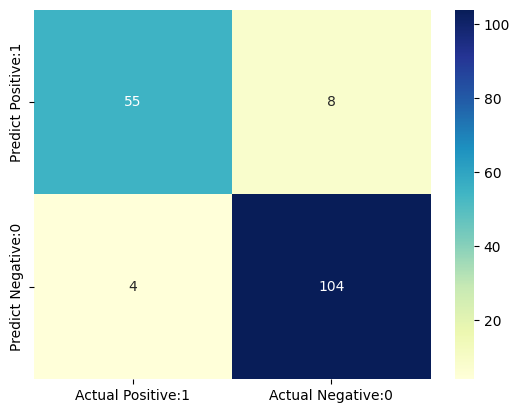

In [43]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');

**Classification Metrices**

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



# LightGBM Parameter Tuning Guidelines

- Few tips to improve LightGBM model efficiency.

- Following set of practices can be used to improve your model efficiency.

  - 1 **num_leaves** : This is the main parameter to control the complexity of the tree model. Ideally, the value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result in overfitting.

  - 2 **min_data_in_leaf** : Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

  - 3 **max_depth** : We also can use max_depth to limit the tree depth explicitly.

**For Faster Speed**

- Use bagging by setting `bagging_fraction` and `bagging_freq`.
- Use feature sub-sampling by setting `feature_fraction`.
- Use small `max_bin`.
- Use `save_binary` to speed up data loading in future learning.

**For better accuracy**

- Use large `max_bin` (may be slower).
- Use small `learning_rate` with `large num_iterations`
- Use large `num_leaves`(may cause over-fitting)
- Use bigger training data
- Try `dart`
- Try to use categorical feature directly.

**To deal with over-fitting**

- Use small `max_bin`
- Use small `num_leaves`
- Use `min_data_in_leaf` and `min_sum_hessian_in_leaf`
- Use bagging by set `bagging_fraction` and `bagging_freq`
- Use feature sub-sampling by set `feature_fraction`
- Use bigger training data
- Try `lambda_l1`, `lambda_l2` and `min_gain_to_split` to regularization
- Try `max_depth` to avoid growing deep tree